Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени
Можно, если речь идет про среднюю цену за квадратный метр или среднюю цену квартиры в регионе.

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
Можно, одна наблюдаемая величина, временной интервал.

в) количество отказов компьютера,
Можно, одна наблюдаемая величина, временной интервал.

г) число обращений в поликлинику по району,
Можно, одна наблюдаемая величина, временной интервал.

д) координаты автобуса при движении по маршруту,
Скорее всего нет, так как координаты автобуса содержат как минимум две величины (ширина и долгота), что делает невозможным отображение ряда.

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
Скорее всего нет, так как координаты  содержат как минимум две величины (ширина и долгота), что делает невозможным отображение ряда.

#### Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

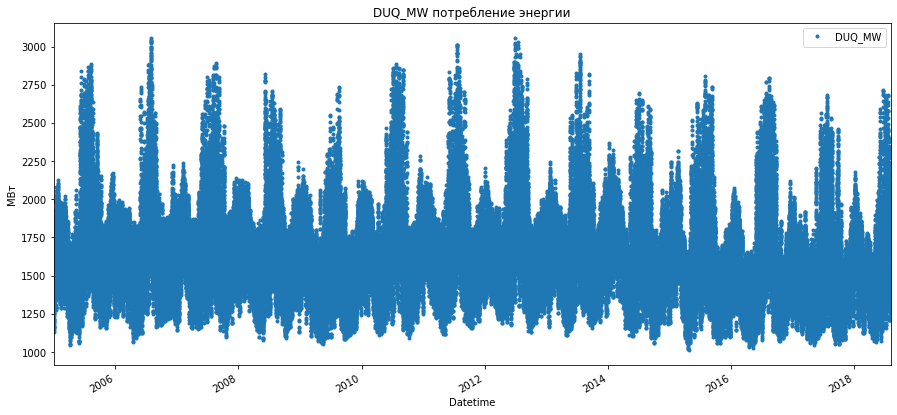

In [5]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )

plt.ylabel ( 'МВт' )

In [7]:
data['Date']=data.index

In [9]:
data['Date'].value_counts()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
                      ..
2007-04-01 02:00:00    1
2011-10-25 02:00:00    1
2016-05-19 02:00:00    1
2005-10-17 21:00:00    1
2013-06-07 22:00:00    1
Name: Date, Length: 119064, dtype: int64

Основные статистики показали, что пропусков нет
Визуальный анализ показывает что предъявленные данные имеют циклы

#### Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [ ]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

In [ ]:
brent_data.resample('W').mean().head()

In [ ]:
brent_data.resample('M').mean().head()

#### Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [ ]:
import matplotlib.ticker as ticker


mean_week=brent_data.resample('W').mean()
fig, ax = plt.subplots()

ax.plot(mean_week, color = 'g', linewidth = 3)

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               labelrotation = 45) 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
mean_month=brent_data.resample('M').mean()
fig, ax = plt.subplots()

ax.plot(mean_month, color = 'g', linewidth = 3)

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               labelrotation = 45) 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
mean_year=brent_data.resample('Y').mean()
fig, ax = plt.subplots()

ax.plot(mean_year, color = 'g', linewidth = 3)


plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
var_year=brent_data.resample('Y').var()
fig, ax = plt.subplots()

ax.plot(var_year, color = 'g', linewidth = 3)


plt.xlabel('Date')
plt.ylabel('Variance')
plt.show()

In [ ]:
var_month=brent_data.resample('M').var()
fig, ax = plt.subplots()

ax.plot(var_month, color = 'g', linewidth = 3)

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               labelrotation = 45) 
plt.xlabel('Date')
plt.ylabel('Variance')
plt.show()

In [ ]:
var_week=brent_data.resample('W').var()
fig, ax = plt.subplots()

ax.plot(var_week, color = 'g', linewidth = 3)

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               labelrotation = 45) 
plt.xlabel('Date')
plt.ylabel('Variance')
plt.show()

#### Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

С увеличением размера группы график средней цены становится более гладким, сохраняя пропорции.
С увеличением размера группы график дисперсии очень сильно изменяет свой вид, связано это с сильным изменением отклонения при расчете по годам ,месяцам и дням.